In [63]:
#Impor Library
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score
import numpy as np

In [64]:
# Impor dataset
data = pd.read_csv('datasetmikir6.csv')
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,class
count,3.680000e+02,368.000000,368.000000,3.680000e+02,3.680000e+02,368.000000,368.000000,368.000000,368.000000,368.000000
mean,4.506356e+07,1.622283,0.298913,8.930707e+07,4.014298e+07,11.929348,54863.000000,56440.040761,4.646739,0.448370
std,1.245262e+08,1.602533,0.458405,1.585407e+08,8.531482e+07,6.597036,30752.289531,32497.575303,2.156086,0.498004
min,3.710000e+04,0.000000,0.000000,5.000000e+06,3.290000e+04,0.000000,10110.000000,1515.000000,1.000000,0.000000
25%,2.079425e+06,0.000000,0.000000,5.000000e+06,2.300000e+06,6.000000,21871.000000,23111.000000,3.000000,0.000000
50%,7.596694e+06,1.000000,0.000000,2.000000e+07,6.325094e+06,13.000000,60112.000000,55231.000000,4.500000,0.000000
75%,2.470755e+07,3.000000,1.000000,5.000000e+07,1.879991e+07,18.000000,90482.000000,88015.500000,6.000000,1.000000
max,1.324810e+09,7.000000,1.000000,4.500000e+08,4.361673e+08,23.000000,98511.000000,150112.000000,8.000000,1.000000


In [65]:
# Cek apakah ada kolom yang kosong
data.isnull().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
class    0
dtype: int64

In [66]:
countDict = {1:0,0:0}
for i in data['class']:
    countDict[i]+=1
print("0: %d\n1: %d"%(countDict[0],countDict[1]))
print(data.shape)
data['class'].value_counts(normalize=True)

0: 203
1: 165
(368, 10)


0    0.55163
1    0.44837
Name: class, dtype: float64

In [67]:
# Feature Scaling
data['normalizedA1'] = StandardScaler().fit_transform(data['A1'].values.reshape(-1,1))
data['normalizedA2'] = StandardScaler().fit_transform(data['A2'].values.reshape(-1,1))
data['normalizedA3'] = StandardScaler().fit_transform(data['A3'].values.reshape(-1,1))
data['normalizedA4'] = StandardScaler().fit_transform(data['A4'].values.reshape(-1,1))
data['normalizedA5'] = StandardScaler().fit_transform(data['A5'].values.reshape(-1,1))
data['normalizedA6'] = StandardScaler().fit_transform(data['A6'].values.reshape(-1,1))
data['normalizedA7'] = StandardScaler().fit_transform(data['A7'].values.reshape(-1,1))
data['normalizedA8'] = StandardScaler().fit_transform(data['A8'].values.reshape(-1,1))
data['normalizedA9'] = StandardScaler().fit_transform(data['A9'].values.reshape(-1,1))
data = data.drop(['A1'],axis=1)
data = data.drop(['A2'],axis=1)
data = data.drop(['A3'],axis=1)
data = data.drop(['A4'],axis=1)
data = data.drop(['A5'],axis=1)
data = data.drop(['A6'],axis=1)
data = data.drop(['A7'],axis=1)
data = data.drop(['A8'],axis=1)
data = data.drop(['A9'],axis=1)
data.head()

,class,normalizedA1,normalizedA2,normalizedA3,normalizedA4,normalizedA5,normalizedA6,normalizedA7,normalizedA8,normalizedA9
0,0,-0.334228,-1.013702,1.531488,-0.532493,-0.459431,-0.292855,-0.865210,-0.867368,-0.764803
1,1,-0.000511,1.485744,-0.652960,-0.469332,-0.447694,-1.658961,0.822130,1.296350,-1.229238
2,0,-0.342269,-0.388841,-0.652960,-0.469332,-0.435956,-1.051803,0.757005,0.421249,1.557371
3,0,-0.256227,0.236021,-0.652960,-0.248268,-0.459431,0.010724,-0.838541,-0.842070,0.164067
4,0,0.039696,-1.013702,1.531488,2.278179,0.702557,-0.900013,-1.261882,-1.192789,-0.300368


In [68]:
# Pembagian Train dan Test
X = data.iloc[:, data.columns != 'class']
y = data.iloc[:, data.columns == 'class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [69]:
# Jumlah Pembagian 
print("No of training Examples : "+str(X_train.shape[0]))
print("No of test Examples : "+str(X_test.shape[0]))
print("Shape of training data : "+str(X_train.shape))
print("Shape of test data : "+str(X_test.shape))
print("Shape of Y train data : "+str(y_train.shape))
print("Shape of Y test data : "+str(y_test.shape))

No of training Examples : 257
No of test Examples : 111
Shape of training data : (257, 9)
Shape of test data : (111, 9)
Shape of Y train data : (257, 1)
Shape of Y test data : (111, 1)


In [70]:
# Buat ANN
classifier = Sequential()
# Input Layer dan Hidden Layer Pertama
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
# Hidden Layer Kedua
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
# Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# ANN Compile
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split=0.33)

Train on 172 samples, validate on 85 samples
Epoch 1/100
172/172 [==============================] - 1s 4ms/step - loss: 0.6932 - acc: 0.4651 - val_loss: 0.6931 - val_acc: 0.4941
Epoch 2/100
172/172 [==============================] - 0s 93us/step - loss: 0.6929 - acc: 0.5349 - val_loss: 0.6931 - val_acc: 0.4941
Epoch 3/100
172/172 [==============================] - 0s 93us/step - loss: 0.6927 - acc: 0.5349 - val_loss: 0.6930 - val_acc: 0.4941
Epoch 4/100
172/172 [==============================] - 0s 81us/step - loss: 0.6924 - acc: 0.5349 - val_loss: 0.6928 - val_acc: 0.4941
Epoch 5/100
172/172 [==============================] - 0s 75us/step - loss: 0.6919 - acc: 0.5349 - val_loss: 0.6925 - val_acc: 0.4941
Epoch 6/100
172/172 [==============================] - 0s 81us/step - loss: 0.6912 - acc: 0.5523 - val_loss: 0.6919 - val_acc: 0.5529
Epoch 7/100
172/172 [==============================] - 0s 70us/step - loss: 0.6901 - acc: 0.6105 - val_loss: 0.6910 - val_acc: 0.6471
Epoch 8/100
172/17

172/172 [==============================] - 0s 110us/step - loss: 0.3496 - acc: 0.8372 - val_loss: 0.4773 - val_acc: 0.7647
Epoch 62/100
172/172 [==============================] - 0s 70us/step - loss: 0.3482 - acc: 0.8372 - val_loss: 0.4791 - val_acc: 0.7647
Epoch 63/100
172/172 [==============================] - 0s 81us/step - loss: 0.3463 - acc: 0.8372 - val_loss: 0.4784 - val_acc: 0.7647
Epoch 64/100
172/172 [==============================] - 0s 70us/step - loss: 0.3443 - acc: 0.8372 - val_loss: 0.4784 - val_acc: 0.7647
Epoch 65/100
172/172 [==============================] - 0s 75us/step - loss: 0.3434 - acc: 0.8372 - val_loss: 0.4781 - val_acc: 0.7647
Epoch 66/100
172/172 [==============================] - 0s 81us/step - loss: 0.3418 - acc: 0.8372 - val_loss: 0.4710 - val_acc: 0.7765
Epoch 67/100
172/172 [==============================] - 0s 64us/step - loss: 0.3397 - acc: 0.8488 - val_loss: 0.4684 - val_acc: 0.7765
Epoch 68/100
172/172 [==============================] - 0s 70us/ste

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


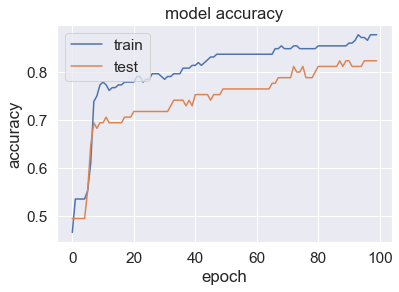

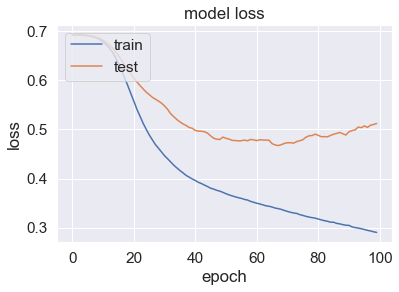

In [71]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
# Predict
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
print("Score test", score)
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
score_pred_train = classifier.evaluate(X_train, y_train)
print("Score train", score_pred_train)

111/111 [==============================] - 0s 36us/step
Score test [0.3929821988483807, 0.8738738744108526]
257/257 [==============================] - 0s 23us/step
Score train [0.3626236358969128, 0.8638132295719845]


In [73]:
#Let's see how our model performed
print("Hasil Test")
print(classification_report(y_test, y_pred))

Hasil Test
              precision    recall  f1-score   support

           0       0.84      0.99      0.91        69
           1       0.97      0.69      0.81        42

    accuracy                           0.87       111
   macro avg       0.90      0.84      0.86       111
weighted avg       0.89      0.87      0.87       111



In [74]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
cm_train = confusion_matrix(y_train, y_pred_train)
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
print(cm)
print("Train Data Accuracy: %0.4f" % accuracy_score(y_train, y_pred_train))
print(cm_train)

Test Data Accuracy: 0.8739
[[68  1]
 [13 29]]
Train Data Accuracy: 0.8638
[[126   8]
 [ 27  96]]


Confusion Matrix Test


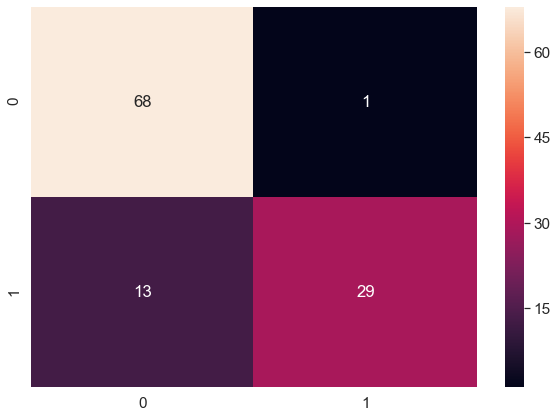

In [75]:
print("Confusion Matrix Test")
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

Confusion Matrix Train


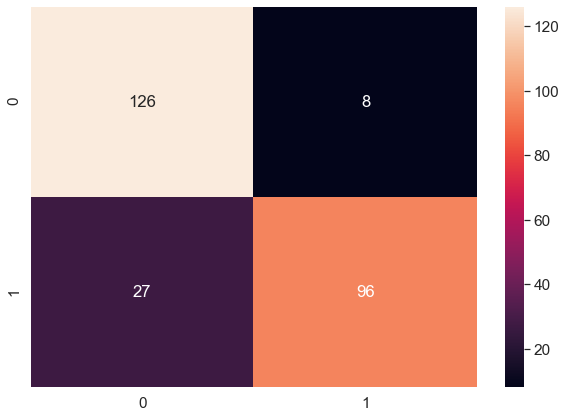

In [76]:
print("Confusion Matrix Train")
df_cm_train = pd.DataFrame(cm_train, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm_train, annot=True, fmt='g')

In [77]:
print(X_test)

     normalizedA1  normalizedA2  normalizedA3  normalizedA4  normalizedA5  \
106     -0.360342      0.236021     -0.652960     -0.532493     -0.469267   
260     -0.273562      0.860883     -0.652960     -0.437752     -0.339725   
45      -0.179030     -0.388841     -0.652960     -0.248268     -0.313302   
26      -0.357918     -1.013702      1.531488     -0.532493     -0.433022   
78      -0.322166     -1.013702      1.531488     -0.248268     -0.177737   
348     -0.302089      0.860883     -0.652960     -0.248268      0.111611   
90       0.843833      0.236021     -0.652960      2.278179      1.876282   
245      0.900514     -1.013702      1.531488      2.278179      1.871555   
240     -0.290299     -1.013702      1.531488     -0.248268     -0.153485   
6       -0.318145     -0.388841     -0.652960     -0.437752     -0.460171   
120     -0.342492     -0.388841     -0.652960     -0.469332     -0.394180   
141      0.026152      0.236021     -0.652960     -0.248268     -0.218503   

In [82]:
pd.set_option('display.max_rows', None)
print(y_test)

     class
106      0
260      1
45       0
26       0
78       0
348      1
90       0
245      0
240      0
6        0
120      0
141      1
264      1
219      0
300      1
358      1
228      0
101      0
266      1
140      0
142      0
200      1
59       0
294      1
268      1
255      1
68       0
312      0
113      0
364      1
124      0
102      0
15       1
37       0
54       0
5        1
60       0
132      0
328      0
64       0
286      0
304      1
213      1
210      1
20       0
306      1
214      1
215      1
241      0
65       0
173      1
221      0
236      0
164      1
92       0
55       0
52       0
135      0
89       0
76       0
186      1
271      1
7        0
100      0
223      0
344      1
56       0
122      0
220      0
159      1
74       0
170      1
114      0
204      1
63       0
356      1
258      1
318      0
246      0
330      0
21       0
144      0
146      1
49       0
307      1
334      0
310      0
327      0
198      1
282      0

In [52]:
print(y_pred)

[[False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]]
